In [1]:
#Importing Neccessary modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [14]:
import pandas as pd

#mnist = keras.datasets.mnist
data = pd.read_csv('checking_out.csv')
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9
0,0,100,156,200,0,254,180,110,0
1,254,150,70,0,70,150,254,150,70
2,0,100,156,200,0,254,180,110,0
3,254,150,70,0,70,150,254,150,70
4,0,100,156,200,0,254,180,110,0
5,254,150,70,0,70,150,254,150,70
6,0,100,156,200,0,254,180,110,0
7,254,150,70,0,70,150,254,150,70
8,0,100,156,200,0,254,180,110,0
9,254,150,70,0,70,150,254,150,70


In [12]:
# WHile still exploring the datasets, this count the unique classes classified in the datasets
# It also print the label of the classes
#class_labels = np.unique(train_labels)
#print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

KeyError: 0

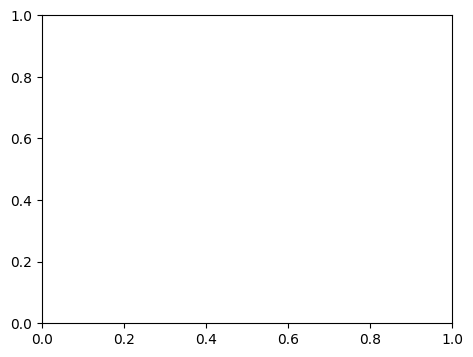

In [13]:
#Plotting the datasets to see some of the data point 
# This determines the size of the shapes
plt.figure(figsize=(18, 4))

# A subplot here, a datapoint

# Syntax is plt.subplot(num_rows, num_cols, plot_index)
plt.subplot(1,1,1) 
plt.imshow(data[0]) #datapoint of index 0 from the train_images datasets is called on
#plt.title("Label: {}".format(data[0]))

"""#Another datapoint for another subplot
plt.subplot(1,3,2)
plt.imshow(train_images[2500]) #datapoint of index 2500 from the train_images datasets is called on
plt.title("Label: {}".format(train_labels[2500]))

#Another datapoint for another subplot
plt.subplot(1,3,3)
plt.imshow(train_images[700]) #datapoint of index 2500 from the train_images datasets is called on
plt.title("Label: {}".format(train_labels[700]))"""
plt.colorbar()
#Now to show my graph
plt.show()

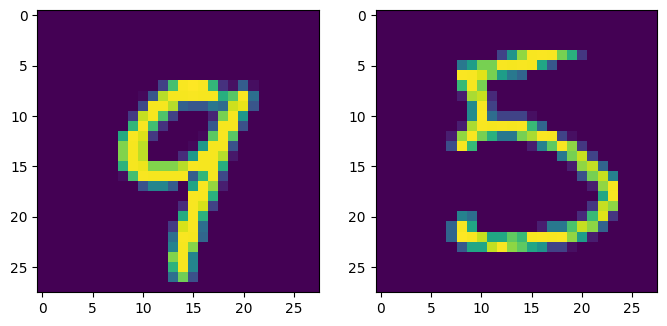

In [7]:
#Viewing some testing data element

plt.figure(figsize=(8,4))

#Ploting a datapoint for another subplot

# Syntax is plt.subplot(num_rows, num_cols, plot_index)
plt.subplot(1,2,1)
plt.imshow(test_images[12]) #datapoint of index 12 from the test_images datasets is called on

#Another datapoint for another subplot
plt.subplot(1,2,2)
plt.imshow(test_images[15]) #datapoint of index 12 from the test_images datasets is called on

# Now to show our plot
plt.show()

In [15]:
# After all this, next is to scale our dataset, 

# Since our datapoint ranges from [0,255], scaling makes it range from 0 to 1.
# The reason is to get better flow when using our code in building the neural netowork
# SO, we do this by dividing by the highest number in the range which is 255
# Say we have a datapoin which is 10, we then say, 10/255 which equates to 0.392156827
# With that, weve scaled that
# So, lets do same for all of them

# Just for last view, we would notice that the the train_images plotted above above, the scale by the side ranges from 0 to 255
# so now, after our scaling here, it would range from 0 to 1. Let Seeee!!!!!!

# For training dataset stored into the train_image variable
train_images_scale = train_images / 255.0

# For testing dataset stored into the test_image variable
test_images_scale = test_images / 255.0


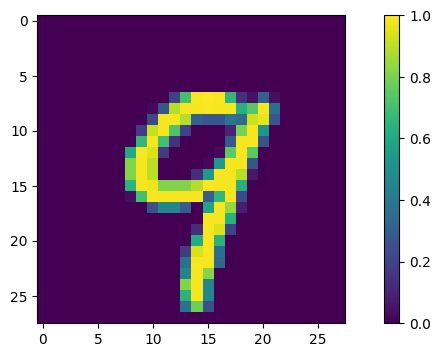

In [16]:
# wants to plot again after scaling

plt.figure(figsize=(10,4))

plt.subplot(1,1,1)
plt.imshow(test_images_scale[12]) 
plt.colorbar()
plt.show()

# Now it's clear, the scaling by the side ranges from 0 to 1 as seen by the side

In [28]:
# Split training data to training and validation sets
# Yes, we already split from training and testing but now, we are spliting the training set to training to validation set
# the reason for this is to help evaluate the model during training to make some decisions, i.e while the model is still training 
# Unlike the testing that will test the model after training, validation evaluat during training 
print(len(train_images_scale))
x_train = train_images_scale[0:50000] 
y_train = train_labels[0:50000]


x_val = train_images_scale[50000: ] 
y_val = train_labels[50000: ]

60000


In [34]:
# Now lets print the shape of every splitted datdset we would be using

# For training dataset
print(f'x_train size is -  {x_train.shape}')
print(f'y_train size is -  {y_train.shape}')

# For validation dataset
print(f'x_val size is -  {x_val.shape}')
print(f'y_val size is -  {y_val.shape}')

# For testing dataset
print(f'test_images size is -  {test_images.shape}')

x_train size is -  (50000, 28, 28)
y_train size is -  (50000,)
x_val size is -  (10000, 28, 28)
y_val size is -  (10000,)
test_images size is -  (10000, 28, 28)


In [35]:
# Reshape data from 28 * 28 array to a single array

new_dimension = np.prod(train_images.shape[1:])

x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)